# Compare (un)corrected VH backscatter and NBR time series

In [1]:
library(strucchange)
library(bfast)
library(zoo)
library(gdalUtils)
library(raster)


ifolder <- 'C:\\Users\\keers001\\OneDrive\ -\ WageningenUR\\RETURN\\Data\\RETURN\\20191019_SimulationOptSAR\\Fire\\'
figfolder <- 'C:\\Users\\keers001\\OneDrive\ -\ WageningenUR\\RETURN\\Data\\RETURN\\20191019_SimulationOptSAR\\Fire\\Figures\\'
crds <- read.csv(file.path(ifolder, 'coor.csv'), header=F)
#crds

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff
Loading required package: sp


In [23]:
# add harmonic part?
S1_h <- 0.05

for (i in 11:17){

crdi <- c(crds$V2[i],crds$V3[i])

#---------------------
# uncorrected S1 VH data
vh <- read.csv(file.path(ifolder, paste0('ee-chart_',i,'_VH.csv')))
dtsvh <- as.Date(vh$system.time_start, format='%b %d, %Y')
tsvh <- vh$VH
tsvh <- tsvh[dtsvh>as.Date('2016-05-01')]
dtsvh <- dtsvh[dtsvh>as.Date('2016-05-01')]

#---------------------
# uncorrected S1 VV data
vv <- read.csv(file.path(ifolder, paste0('ee-chart_',i,'_VV.csv')))
dtsvv <- as.Date(vv$system.time_start, format='%b %d, %Y')
tsvv <- vv$VV
tsvv <- tsvv[dtsvv>as.Date('2016-05-01')]
dtsvv <- dtsvv[dtsvv>as.Date('2016-05-01')]


#---------------------
# corrected S1 VH data
vhc <- brick(file.path(ifolder, paste0('S1_VH_stack_',i,'.tif')))
sp = SpatialPoints(cbind(crds$V2[i],crds$V3[i]))

proj4string(sp) = CRS("+init=epsg:4326")
SPtrans = spTransform(sp, crs(vhc))
met <- gdalinfo(file.path(ifolder,paste0('S1_VH_stack_',i,'.tif')))
ind <- grep( ' Description = ', met)
mp <- strsplit(gsub(' Description = ', '', met[ind]), '_')
dts <- sapply(strsplit(sapply(mp, `[`, 6),'T'), `[`, 1)
dts <- as.Date(dts,format = '%Y%m%d')
tsc <- extract(vhc, SPtrans, method='simple', buffer=NULL, small=FALSE, cellnumbers=FALSE, 
                     fun=NULL, na.rm=TRUE,1, df=FALSE, factors=FALSE)
tsc <- tsc[dts>as.Date('2016-05-01')]
dts <- dts[dts>as.Date('2016-05-01')]
tsco  <- bfastts(tsc[is.na(tsc)==F],dts[is.na(tsc)==F], type='irregular')     

#---------------------
# corrected S1 VV data
vvc <- brick(file.path(ifolder, paste0('S1_VV_stack_',i,'.tif')))
metvvc <- gdalinfo(file.path(ifolder,paste0('S1_VV_stack_',i,'.tif')))
indvvc <- grep( ' Description = ', metvvc)
mpvvc <- strsplit(gsub(' Description = ', '', metvvc[ind]), '_')
dtsvvc <- sapply(strsplit(sapply(mpvvc, `[`, 6),'T'), `[`, 1)
dtsvvc <- as.Date(dtsvvc,format = '%Y%m%d')
tsvvc <- extract(vvc, SPtrans, method='simple', buffer=NULL, small=FALSE, cellnumbers=FALSE, 
                     fun=NULL, na.rm=TRUE,1, df=FALSE, factors=FALSE)
tsvvc <- tsvvc[dtsvvc>as.Date('2016-05-01')]
dtsvvc <- dtsvvc[dtsvvc>as.Date('2016-05-01')]
tscovvc  <- bfastts(tsvvc[is.na(tsvvc)==F],dts[is.na(tsvvc)==F], type='irregular')     

#---------------------
# multitemporal corrected S1 VH data
vhcm <- brick(file.path(ifolder, paste0('S1_VH_stack_',i,'_multi.tif')))

metm <- gdalinfo(file.path(ifolder,paste0('S1_VH_stack_',i,'_multi.tif')))
indm <- grep( ' Description = ', metm)
mpm <- strsplit(gsub(' Description = ', '', metm[indm]), '_')
dtsm <- sapply(strsplit(sapply(mpm, `[`, 6),'T'), `[`, 1)
dtsm <- as.Date(dtsm,format = '%Y%m%d')
tscm <- extract(vhcm, SPtrans, method='simple', buffer=NULL, small=FALSE, cellnumbers=FALSE, 
                     fun=NULL, na.rm=TRUE,1, df=FALSE, factors=FALSE)
tscm <- tscm[dtsm>as.Date('2016-05-01')]
dtsm<- dtsm[dtsm>as.Date('2016-05-01')]
tscom  <- bfastts(tscm[is.na(tscm)==F],dtsm[is.na(tscm)==F], type='irregular')     

#---------------------
# multitemporal corrected S1 VV data
vvcm <- brick(file.path(ifolder, paste0('S1_VV_stack_',i,'_multi.tif')))

metvvm <- gdalinfo(file.path(ifolder,paste0('S1_VV_stack_',i,'_multi.tif')))
indvvm <- grep( ' Description = ', metvvm)
mpvvm <- strsplit(gsub(' Description = ', '', metvvm[indvvm]), '_')
dtsvvm <- sapply(strsplit(sapply(mpvvm, `[`, 6),'T'), `[`, 1)
dtsvvm <- as.Date(dtsvvm,format = '%Y%m%d')
tscvvm <- extract(vvcm, SPtrans, method='simple', buffer=NULL, small=FALSE, cellnumbers=FALSE, 
                     fun=NULL, na.rm=TRUE,1, df=FALSE, factors=FALSE)
tscvvm <- tscvvm[dtsvvm>as.Date('2016-05-01')]
dtsvvm<- dtsvvm[dtsvvm>as.Date('2016-05-01')]
tscovvm  <- bfastts(tscvvm[is.na(tscvvm)==F],dtsvvm[is.na(tscvvm)==F], type='irregular')     

#---------------------
# sementation uncorrected vh data
tsi <- bfastts(tsvh[is.na(tsvh)==F],dtsvh[is.na(tsvh)==F], type='irregular')
datapp <- bfastpp(tsi, order = 1, lag = NULL, slag = NULL,
                 na.action = na.omit, stl = 'none')
bp <- breakpoints(response ~ trend, data = datapp, h = S1_h)##, breaks = nbrks

#---------------------
# sementation uncorrected vv data
tsvvi <- bfastts(tsvv[is.na(tsvv)==F],dtsvv[is.na(tsvv)==F], type='irregular')
datappvv <- bfastpp(tsvvi, order = 1, lag = NULL, slag = NULL,
                 na.action = na.omit, stl = 'none')
bpvv <- breakpoints(response ~ trend, data = datappvv, h = S1_h)##, breaks = nbrks

#---------------------
# sementation corrected vh data
datappc <- bfastpp(tsco, order = 1, lag = NULL, slag = NULL,
                 na.action = na.omit, stl = 'none')
bpc <- breakpoints(response ~ trend, data = datappc, h = S1_h)##, breaks = nbrks
# sementation corrected vv data
datappcvv <- bfastpp(tscovvc, order = 1, lag = NULL, slag = NULL,
                 na.action = na.omit, stl = 'none')
bpcvv <- breakpoints(response ~ trend, data = datappcvv, h = S1_h)##, breaks = nbrks

# sementation corrected multitemporal vh data
datappcm <- bfastpp(tscom, order = 1, lag = NULL, slag = NULL,
                 na.action = na.omit, stl = 'none')
bpcm <- breakpoints(response ~ trend, data = datappcm, h = S1_h)##, breaks = nbrks

# sementation corrected multitemporal vv data
datappcvvm <- bfastpp(tscovvm, order = 1, lag = NULL, slag = NULL,
                 na.action = na.omit, stl = 'none')
bpcvvm <- breakpoints(response ~ trend, data = datappcvvm, h = S1_h)##, breaks = nbrks

# ----------------------
# prepare fire data
fire <- read.csv(file.path(ifolder, paste0('ee-chart_',i,'_doy.csv')))
fireconf <- read.csv(file.path(ifolder, paste0('ee-chart_',i,'_conf.csv')))
dtsfire <- as.Date(fire$system.time_start, format='%b %d, %Y')
fire <- as.numeric(fire$b1)
fireconf <- as.numeric(fireconf$b1)
doy <- fire[fireconf>95]
fireyr <- as.numeric(format(dtsfire[fireconf>95],'%Y'))
firedate <- as.Date(paste0(format(dtsfire[fireconf>95],'%Y'),'-',doy),'%Y-%j')

#---------------------
# create zoo time series objects
tsz <- as.zoo(tsi)
tszvv <- as.zoo(tsvvi)
tscz <- as.zoo(tsco)
tsczvv <- as.zoo(tscovvc)
tsczm <- as.zoo(tscom)
tsczvvm <- as.zoo(tscovvm)
#m.av<-rollmean(tsz[is.na(tsz)==F], 7,fill = list(NA,NA,NA, NULL, NA,NA,NA))
tsbp<-zoo(bfastts(as.numeric(fitted(bp)),sort(dtsvh[is.na(tsvh)==F]), type='irregular'))
tsbpvv<-zoo(bfastts(as.numeric(fitted(bpvv)),sort(dtsvv[is.na(tsvv)==F]), type='irregular'))
tsbpc<-zoo(bfastts(as.numeric(fitted(bpc)),sort(dts[is.na(tsc)==F]), type='irregular'))
tsbpcvv<-zoo(bfastts(as.numeric(fitted(bpcvv)),sort(dtsvvc[is.na(tsvvc)==F]), type='irregular'))
tsbpcm<-zoo(bfastts(as.numeric(fitted(bpcm)),sort(dtsm[is.na(tscm)==F]), type='irregular'))
tsbpcvvm<-zoo(bfastts(as.numeric(fitted(bpcvvm)),sort(dtsvvm[is.na(tscvvm)==F]), type='irregular'))

#---------------------
# plot - compare uncorrected and corrected backscatter
cexi <- 2
png(filename = file.path(figfolder,paste0("CompCorr_", i, ".png")),
    width = 1000, height = 800, units = "px")
par(mar = c(5, 5, 4, 2) + 0.1)
plot(tsz[is.na(tsz)==F], 
     xlab = 'Time', ylab = 'VH backscatter [dB]', main = paste0('Lon ', crdi[1], ', Lat ', crdi[2]),
    col='darkseagreen2', lw=2,#, xaxt = "n"
    cex.lab=cexi, cex.axis=cexi, cex.main=cexi, cex.sub=cexi)
#lines(m.av, col='red', lw=2)
lines(tscz[is.na(tscz)==F], col='darkgoldenrod1', lw=2)
lines(tsczm[is.na(tsczm)==F], col='brown1', lw=2)
lines(tsbp[is.na(tsbp)==F], col='darkcyan', lw=3)
lines(tsbpc[is.na(tsbpc)==F], col='darkgoldenrod3', lw=3)
lines(tsbpcm[is.na(tsbpcm)==F], col='brown3', lw=3)
abline(v=fireyr+doy/366, col = 'gray', lw=3, lty=5)
legend('topright', c('Before correction', 'Lee correction','Multi Lee corr'),#,'Segment before corr','Segment Lee corr', 'Segment multi corr'
        col=c("darkseagreen2", "darkgoldenrod1",'brown1'),   #, "darkcyan", "darkgoldenrod3",'brown3'
        lty=c(1,1, 1),
      lwd = c(2,2,2),
      cex = cexi)
#axis(1, aat = dtsvh[is.na(tsvh)==F], format(dtsvh[is.na(tsvh)==F], "%Y"), cex.axis = .7)
dev.off()

#---------------------
# plot - compare uncorrected and corrected backscatter vv
cexi <- 2
png(filename = file.path(figfolder,paste0("CompCorrVV_", i, ".png")),
    width = 1000, height = 800, units = "px")
par(mar = c(5, 5, 4, 2) + 0.1)
plot(tszvv[is.na(tszvv)==F], 
     xlab = 'Time', ylab = 'VV backscatter [dB]', main = paste0('Lon ', crdi[1], ', Lat ', crdi[2]),
    col='darkseagreen2', lw=2,
    cex.lab=cexi, cex.axis=cexi, cex.main=cexi, cex.sub=cexi)
#lines(m.av, col='red', lw=2)
lines(tsczvv[is.na(tsczvv)==F], col='darkgoldenrod1', lw=2)
lines(tsczvvm[is.na(tsczvvm)==F], col='brown1', lw=2)
lines(tsbpvv[is.na(tsbpvv)==F], col='darkcyan', lw=3)
lines(tsbpcvv[is.na(tsbpcvv)==F], col='darkgoldenrod3', lw=3)
lines(tsbpcvvm[is.na(tsbpcvvm)==F], col='brown3', lw=3)
abline(v=fireyr+doy/366, col = 'gray', lw=3, lty=5)
legend('topright', c('Before correction', 'Lee correction','Multi Lee corr'),#,'Segment before corr','Segment Lee corr', 'Segment multi corr'
        col=c("darkseagreen2", "darkgoldenrod1",'brown1'),   #, "darkcyan", "darkgoldenrod3",'brown3'
        lty=c(1,1, 1),
      lwd = c(2,2,2),
      cex = cexi)
dev.off()

#---------------------
# nbr data
nbr <- read.csv(file.path(ifolder, paste0('ee-chart_',i,'_nbr.csv')))
dtsnbr <- as.Date(nbr$system.time_start, format='%b %d, %Y')
nbrun <- as.numeric(nbr$NBR[!duplicated(dtsnbr)])
dtsnbrun <- dtsnbr[!duplicated(dtsnbr)]
tsnbr <- zoo(bfastts(nbrun,dtsnbrun, type='irregular'))

#---------------------
# sementation optical data
datappnbr <- bfastpp(bfastts(nbrun,dtsnbrun, type='irregular'), order = 1, lag = NULL, slag = NULL,
                 na.action = na.omit, stl = 'none')
bpnbr <- breakpoints(response ~ trend , data = datappnbr, h = 0.05)##, breaks = nbrks
tsbpnbr<-zoo(bfastts(as.numeric(fitted(bpnbr)),sort(dtsnbrun[is.na(nbrun)==F]), type='irregular'))

#---------------------
# plot - compare optical and radar data
cexi <- 3
png(filename = file.path(figfolder,paste0("CompOpt_", i, ".png")),
    width = 1200, height = 1000, units = "px")
par(mfrow=c(3, 1),
          oma = c(6,4,0,0) + 0.1,
          mar = c(1, 3, 4, 2) + 0.1, mgp = c(5, 2, 0), xpd = NA)    
plot(tsczm[is.na(tsczm)==F],#vhzoo
     xlim =c(min(as.numeric(format(dtsm, '%Y')), as.numeric(format(dtsnbr, '%Y'))), 1+max(as.numeric(format(dtsm, '%Y')), as.numeric(format(dtsnbr, '%Y')))), 
     xlab = '', ylab = 'VH backscatter [dB]', main = paste0('Lon ', crdi[1], ', Lat ', crdi[2]), col='brown1',
     xaxt='n',lwd = 3,
    cex.lab=cexi, cex.axis=cexi, cex.main=cexi, cex.sub=cexi)
lines(tsbpcm[is.na(tsbpcm)==F], col='brown3', lw=4)
abline(v=fireyr+doy/366, col = 'gray', lw=3, lty=5)

plot(tsczvvm[is.na(tsczvvm)==F],#vhzoo
     xlim =c(min(as.numeric(format(dtsvvm, '%Y')), as.numeric(format(dtsnbr, '%Y'))), 1+max(as.numeric(format(dtsvvm, '%Y')), as.numeric(format(dtsnbr, '%Y')))), 
     xlab = '', ylab = 'VV backscatter [dB]', col='brown1',
     xaxt='n',lwd = 3,
    cex.lab=cexi, cex.axis=cexi, cex.main=cexi, cex.sub=cexi)
lines(tsbpcvvm[is.na(tsbpcvvm)==F], col='brown3', lw=4)
abline(v=fireyr+doy/366, col = 'gray', lw=3, lty=5)

plot(tsnbr[is.na(tsnbr)==F], col='black', type = 'o',#vhzoo
     xlim =c(min(as.numeric(format(dts, '%Y')), as.numeric(format(dtsnbr, '%Y'))), 1+max(as.numeric(format(dts, '%Y')), as.numeric(format(dtsnbr, '%Y')))), 
     ylim = c(min(tsbpnbr[is.na(tsbpnbr)==F],tsnbr[is.na(tsnbr)==F]),max(tsbpnbr[is.na(tsbpnbr)==F],tsnbr[is.na(tsnbr)==F])),
     xlab = 'Time', ylab = 'NBR [-]', lwd = 3,
    cex.lab=cexi, cex.axis=cexi, cex.main=cexi, cex.sub=cexi)
lines(tsbpnbr[is.na(tsbpnbr)==F], col='gray', lw=4)
abline(v=fireyr+doy/366, col = 'gray', lw=3, lty=5)
dev.off()
}

In [51]:
doy
fireyr

[1] 241

[1] 2018

In [19]:
head(datapp)

,time,response,trend,season,harmon
,<dbl>,<dbl>,<int>,<fct>,"<dbl[,2]>"
1,2017.403,-11.566,1,148,"-0.8190149, 0.573772268"
13,2017.436,-13.976,13,160,"-0.9192860, 0.393590277"
25,2017.468,-17.175,25,172,"-0.9804692, 0.196672890"
37,2017.501,-8.386,37,184,"-0.9999630, -0.008606997"
49,2017.534,-12.932,49,196,"-0.9769385, -0.213520915"
61,2017.567,-13.921,61,208,"-0.9123748, -0.409355959"


In [70]:
coef(bp)


,(Intercept),trend,harmoncos,harmonsin
0.0151515151515152 - 0.454545454545455,-11.65545,-0.023700337,0.6719442,-0.9142534
0.46969696969697 - 1,-18.51578,0.003089972,-0.6311545,0.6484076


2017(148) 2017(160) 2017(172) 2017(184) 2017(196) 2017(208) 2017(220) 2017(232) 
  -11.566   -13.976   -17.175    -8.386   -12.932   -13.921   -14.348   -14.476 
2017(244) 2017(268) 2017(280) 2017(292) 2017(304) 2017(316) 2017(328) 2017(340) 
  -12.843   -13.982   -12.907   -14.179   -15.626   -13.204   -12.507   -14.291 
2017(352) 2017(364)  2018(11)  2018(23)  2018(35)  2018(47)  2018(59)  2018(71) 
  -16.898   -16.195   -18.809   -17.313   -16.233   -21.331   -16.807   -23.726 
 2018(83)  2018(95) 2018(107) 2018(119) 2018(131) 2018(143) 2018(155) 2018(167) 
  -15.253   -19.488   -15.729   -23.152   -19.946   -24.154   -15.620   -14.906 
2018(179) 2018(311) 2018(323) 2018(335) 2018(347) 2018(359)   2019(6)  2019(18) 
  -18.685   -17.961   -16.744   -20.892   -14.379   -17.633   -15.177   -18.052 
 2019(30)  2019(42)  2019(54)  2019(66)  2019(78)  2019(90) 2019(102) 2019(114) 
  -18.272   -17.526   -14.723   -18.089   -17.792   -18.148   -14.920   -13.618 
2019(126) 2019(138) 2019(150

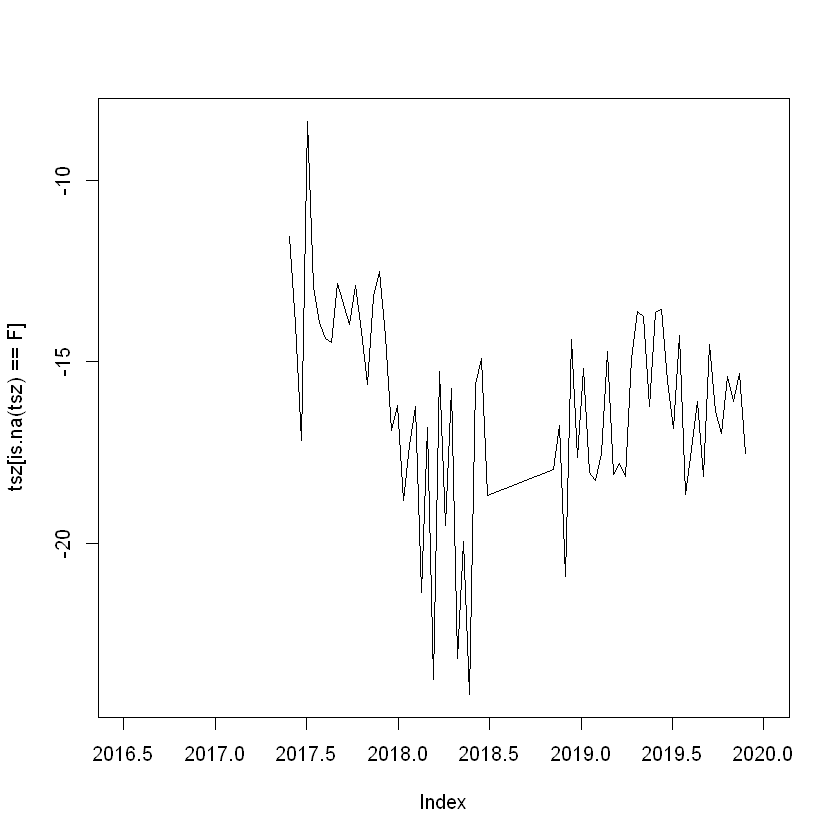

In [22]:
plot(tsz[is.na(tsz)==F], xlim=c(2016.5,2020))
#lines(m.av, col='red', lw=2)
tsz[is.na(tsz)==F]